In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

from graspy.simulations import p_from_latent, sample_edges
from tqdm import tqdm_notebook as tqdm
import seaborn as sns

%matplotlib inline

In [3]:
def profile(test, metric, n_sims=200, n_verts=200, n_components=2, directed=False):
    latent_size = (n_verts, n_components)
    latent = np.random.uniform(0.2, 0.5, size=latent_size)

    p_mat = p_from_latent(latent, rescale=False, loops=False)

    sim_p_vals = np.zeros(n_sims)
    for i in tqdm(range(n_sims)):
        graph1 = sample_edges(p_mat, directed=directed, loops=False)
        graph2 = sample_edges(p_mat, directed=directed, loops=False)
        ldt = LatentDistributionTest(test, metric, 
                                     n_components=n_components, n_bootstraps=100)
        out = ldt.fit(graph1, graph2)
        p_val = ldt.p_value_
        sim_p_vals[i] = p_val
    return sim_p_vals

def plot_sim(sim_p_vals, n_sims=200, n_verts=200, n_components=2):
    sns.set_context("paper", font_scale=1.5)
    plt.style.use("seaborn-white")
    sns.set_palette("deep")
    kwargs = {'cumulative': True}
    sns.distplot(sim_p_vals, hist_kws=kwargs, kde_kws=kwargs)
    plt.plot(np.arange(len(sim_p_vals))/len(sim_p_vals), np.linspace(1/len(sim_p_vals),1,num=len(sim_p_vals)))
    plt.xlabel("P-value")
    plt.title(f"n_sims: {n_sims}, n_verts: {n_verts}, n_components: {n_components}")
    plt.show()

/Users/bijanvarjavand/Documents/spring20/ndd/venv-graspy/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


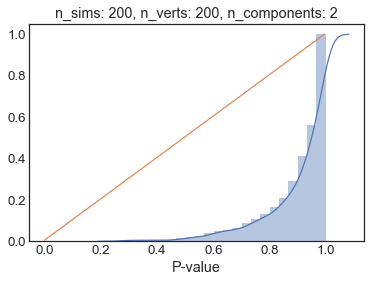

In [4]:
dcorr_euclidean = profile("dcorr", "euclidean")
plot_sim(dcorr_euclidean)

/Users/bijanvarjavand/Documents/spring20/ndd/venv-graspy/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


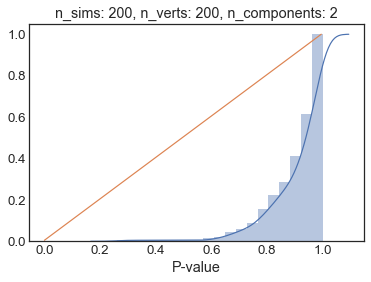

In [5]:
dcorr_gaussian = profile("dcorr", "euclidean")
plot_sim(dcorr_gaussian)